# Music Popularity Prediction
**ECE 143**

**Peng Wei Lee, Karrmanya Pande, Yue Yu, Henri Schulz, Karl Hernandez**

## Table of Contents
1. Introduction
2. Datasets
3. Data Cleaning
4. Exploratory Data Analysis
5. Metric Selection
6. Model Building
7. Model Evaluation
8. Conclusion

## 1. Introduction
- Brief description of the project
- Objectives and goals


## 2. Datasets
**data1 : [Top 100 Songs & Lyrics By Year 1959 - 2023 (USA)](https://www.kaggle.com/datasets/brianblakely/top-100-songs-and-lyrics-from-1959-to-2019)**
- Description:
    - TODO
- Relevant Features:
    - artist, lyrics, rank, release date, song title, year, verbs, nouns, adverb, corpus, word count, unique word count
- Irrelevant features:
    - featured artist, media, url, writers, album, album url
- Selected Files:
    - [all_songs_data.csv](./data/data1.csv)

**data2 : [MusicOSet Popularity](https://marianaossilva.github.io/DSW2019/?utm_source=chatgpt.com#tables)**
- Description:
    - TODO
- Relevant Features:
    - song name, artist, popularity, song type
- Irrelevant features:
    - song_id, explicit, key of artist dictionary, billboard
- Selected Files:
    - [musicOset_popularity/song_chart.csv](./data/data2.csv)

**data3 : [SpotGenTrack Popularity Dataset](https://data.mendeley.com/datasets/4m2x4zngny/1)**
- Description:
    - TODO
- Relevant Features:
    - acoustics, available markets, danceability, duration, energy, instrumentalness, key, liveness, loudness, lyrics, name, popularity, speechness, tempo, time signature, valence
- Irrelevant features:
    - serial number, album id, analysis url, artist id, disk number, href, id, mode, playlist, preview url, track_href, track name prev, track number, uri, type
- Selected Files:
    - [SpotGenTrack/Data Sources/spotify_tracks.csv](./data/data3.csv)

**data4 : [Spotify and Youtube Statistics](https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube)**
- Description:
    - TODO
- Relevant Features:
    - artist, track, danceability, energy, key, loudness, speechness, acoustics,instrumentalness, liveness, valence, tempo, duration, views, likes, comments, streams
- Irrelevant Features:
    - url_spotify, album, album type, url, url_youtube, title, channel, description, licensed, official_video
- Selected Files:
    - [Spotify_Youtube.csv](./data/data4.csv)


## 3. Data Cleaning

First, we will install all necessary requirements:

In [2]:
%pip install -qr requirements.txt
import numpy as np
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


Next, we will delete all columns that are not of interest:

In [3]:
def delete_data_columns(file:str, columns_to_drop:list, new_file:str):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file)
    df = df.drop(columns=columns_to_drop)

    # Save the updated DataFrame back to a CSV file (if you want to overwrite it or create a new one)
    df.to_csv(new_file, index=False)
    print(df)

file = 'data_files/data1.csv'
columns_to_drop = ['Album','Album URL','Featured Artists','Media','Song URL','Writers']
new_file = 'data_files/new_data1.csv'
delete_data_columns(file, columns_to_drop,new_file)
file = 'data_files/data3.csv'
columns_to_drop = ['album_id','analysis_url','artists_id','disc_number','href','id','playlist','preview_url','track_href','track_name_prev','track_number','uri','valence']
new_file = 'data_files/new_data3.csv'
delete_data_columns(file, columns_to_drop,new_file)
file = 'data_files/data4.csv'
columns_to_drop = ['Url_spotify','Track','Album','Album_type','Uri','Valence','Url_youtube','Channel','Licensed','official_video']
new_file = 'data_files/new_data4.csv'
delete_data_columns(file, columns_to_drop,new_file)

FileNotFoundError: [Errno 2] No such file or directory: 'data_files/data1.csv'

Now we will apply some transforms 

TODO Explain more and correct code

In [ ]:
from math import floor

def log_popularity(views, likes):
    # Apply logarithmic scaling to views and likes
    log_views = np.log1p(views)  # log1p ensures that log(0) is handled
    log_likes = np.log1p(likes)
    
    # Combine them (e.g., average of log-transformed values)
    combined_log = [(lv + ll) / 2 for lv, ll in zip(log_views, log_likes)]
    
    # Normalize the combined log scores to a range between 5 and 95
    min_log = np.min(combined_log)
    max_log = np.max(combined_log)
    popularity = [(95 - 5) * (score - min_log) / (max_log - min_log) + 5 for score in combined_log]
    popularity = [floor(score) for score in popularity]
    return popularity

# Function to read the CSV, calculate popularity, remove description column, and save the updated CSV
def add_popularity_column(input_file, output_file, weight_views=0.3, weight_likes=0.7):
    # Read the CSV file
    df = pd.read_csv(input_file)

    # Drop rows where both Views and Likes are missing or NaN
    df = df.dropna(subset=['Views', 'Likes'], how='all')

    # Set Likes = 0 if Views is present but Likes is missing
    df['Likes'] = df.apply(lambda row: 0 if pd.isna(row['Likes']) else row['Likes'], axis=1)
    
    # Set Views = Likes if only Likes is present (i.e., Views is missing)
    df['Views'] = df.apply(lambda row: row['Likes'] if pd.isna(row['Views']) else row['Views'], axis=1)

    # Drop the 'Description' column if it exists
    if 'Description' in df.columns:
        df = df.drop(columns=['Description'])
    
    # Extract Views and Likes columns
    views = df['Views'].tolist()
    likes = df['Likes'].tolist()

    # Calculate the popularity score
    popularity_scores = log_popularity(views, likes)
    
    # Add popularity as a new column to the dataframe
    df['Popularity'] = popularity_scores
    
    # Save the updated dataframe to a new CSV file
    df.to_csv(output_file, index=False)

# Example usage
input_file = 'C:/Users/Karmanya Pandey/Desktop/UCSD/Winter Quarter 24/ECE 143/Project/data_files/new_data4.csv'  # Your input CSV file name
output_file = 'C:/Users/Karmanya Pandey/Desktop/UCSD/Winter Quarter 24/ECE 143/Project/data_files/new_data4_updated.csv'  # New CSV file with the popularity column

# Call the function to add the popularity column
add_popularity_column(input_file, output_file)





NameError: name 'pd' is not defined

Now that we have all the data in usable forms, we will merge them all into a singular combined dataset

TODO: Correct

In [ ]:
import pandas as pd

# Read the CSV files
file1 = pd.read_csv("./data/new_data1_updated.csv")
file2 = pd.read_csv("./data/new_data2_updated.csv")
file3 = pd.read_csv("./data/new_data3_updated.csv")
file4 = pd.read_csv("./data/new_data4_updated.csv")

# Rename columns to make them consistent across all files
#file4.rename(columns={'Track': 'song_name'}, inplace=True)
file2.rename(columns={'artists': 'Artist', 'song_type': 'Song_type'}, inplace=True)
#file1.rename(columns={'Song Title': 'song_name'}, inplace=True)
file3.rename(columns={'acousticness': 'Acousticness', 'available_markets': 'Available_markets', 'lyrics': 'Lyrics', 'country': 'Country','danceability': 'Danceability', 'duration_ms': 'Duration_ms', 'instrumentalness': 'Instrumentalness', 'key': 'Key', 'liveness': 'Liveness', 'loudness': 'Loudness', 'mode': 'Mode', 'speechiness': 'Speechiness', 'tempo': 'Tempo', 'time_signature': 'Time_signature', 'type': 'Song_type'}, inplace=True)
# Merge all the files on the common columns
merged_df = pd.concat([file1, file2, file3, file4], axis=0, ignore_index=True)

# Combine columns 'song_name', 'name', 'Track', 'Song Title' into one column
merged_df['song_name'] = merged_df[['song_name', 'name', 'Track', 'Song Title']].bfill(axis=1).iloc[:, 0]
merged_df.drop(columns=['name', 'Track', 'Song Title'], inplace=True)

merged_df['Popularity'] = merged_df[['Popularity', 'popularity']].bfill(axis=1).iloc[:, 0]
merged_df.drop(columns=['popularity'], inplace=True)

# Group by 'song_name' and aggregate by filling NaN values with the available data
merged_df = merged_df.groupby('song_name', as_index=False).first()

# Now you can save the merged CSV file
merged_df.to_csv('./data/combine_all.csv', index=False)

Lastly, we need to remove all songs that don't have a popularity ranking:

## 4. Exploratory Data Analysis

First, we will examine the correlation between each of the numerical features and the popularity of the music.


Sorted Correlation Results (By Statistical Significance):


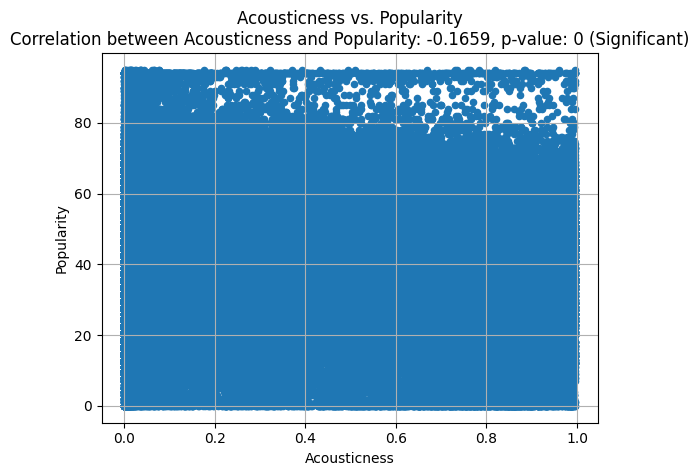

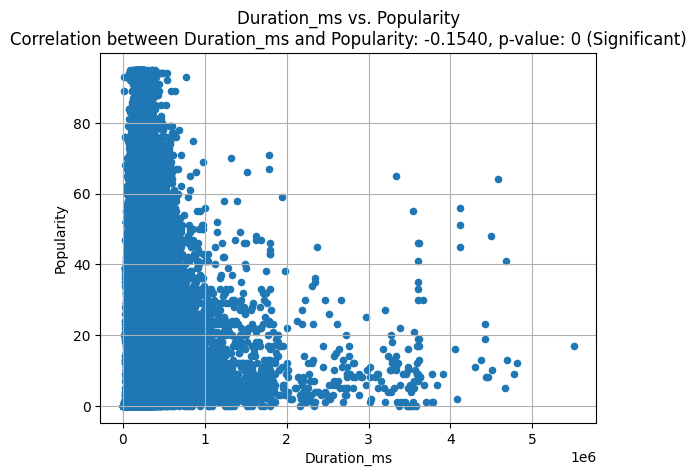

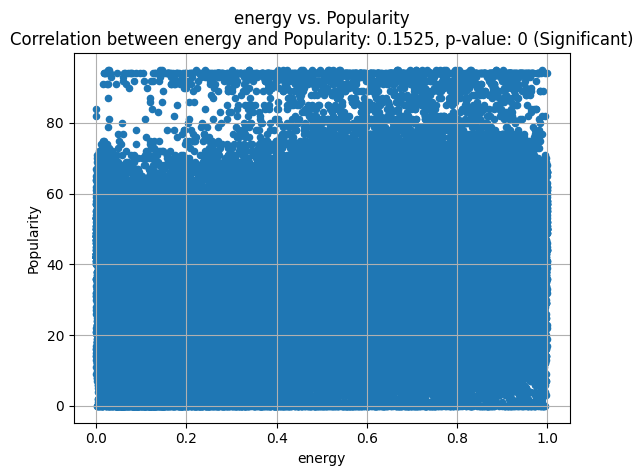

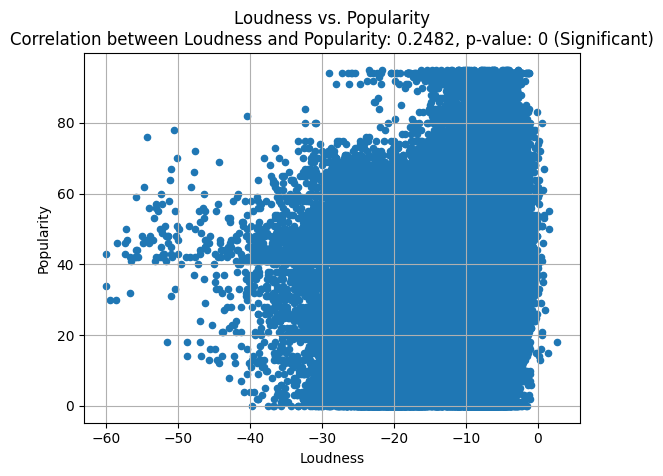

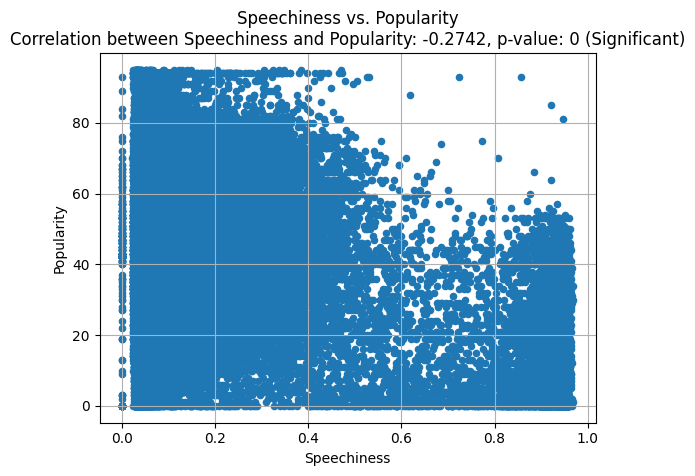

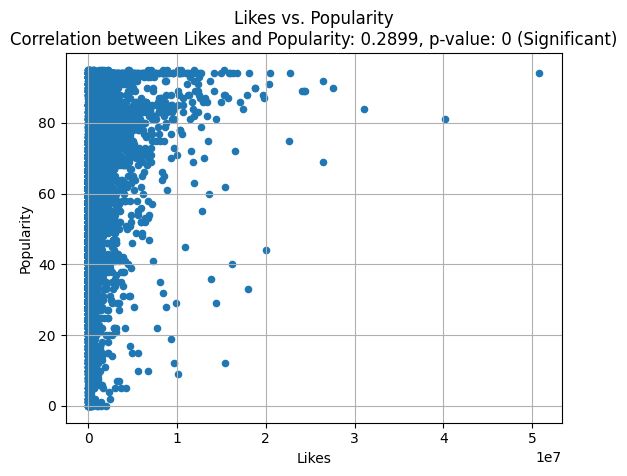

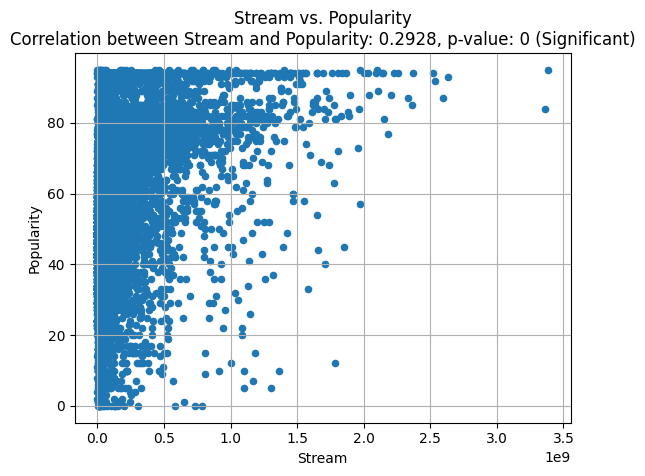

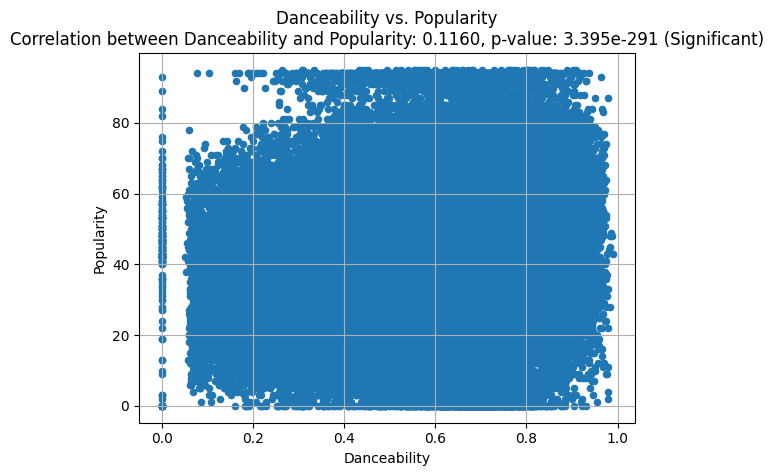

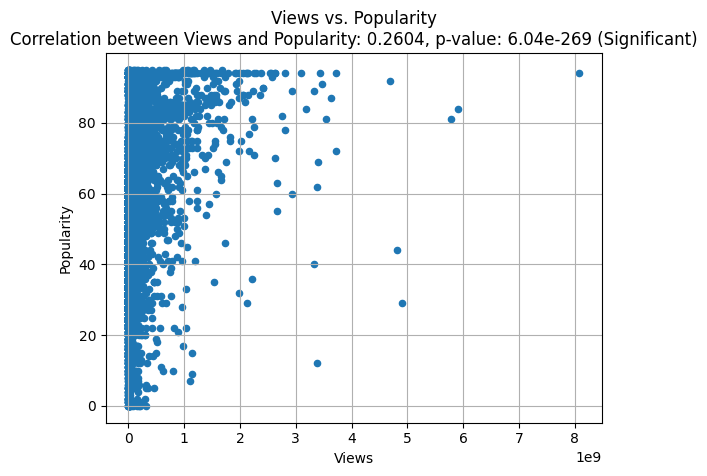

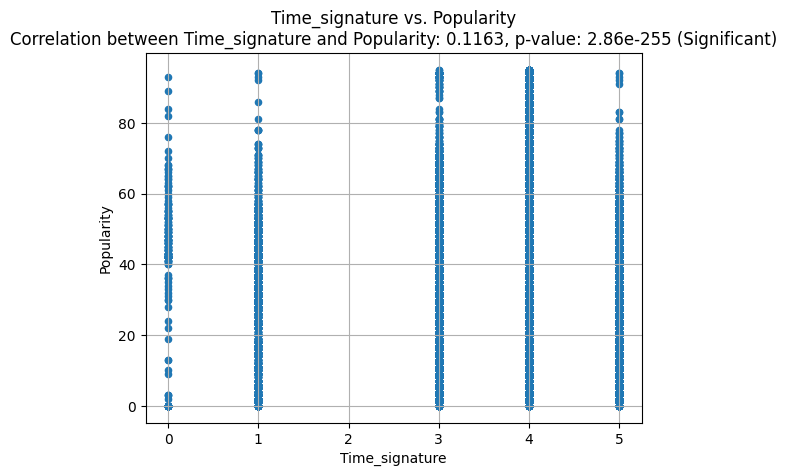

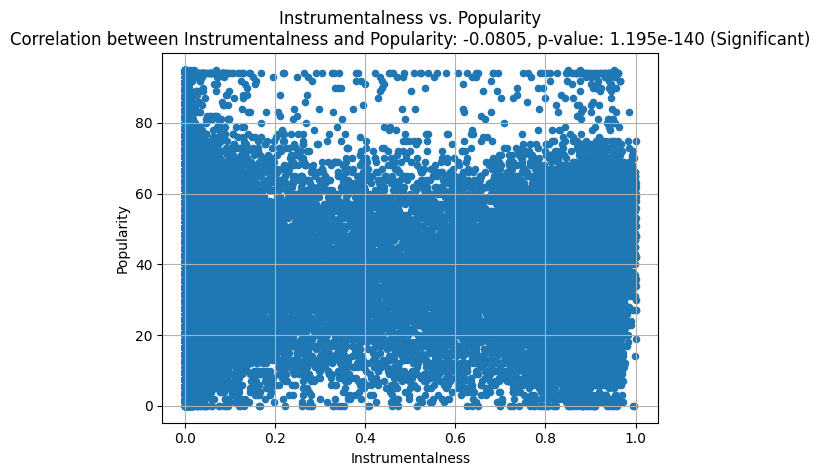

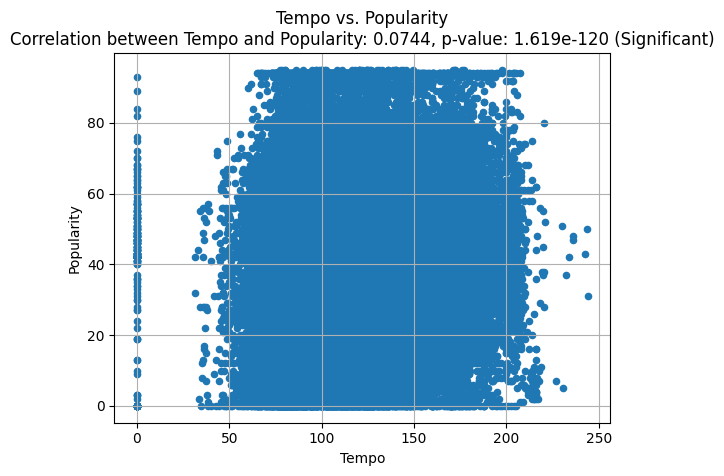

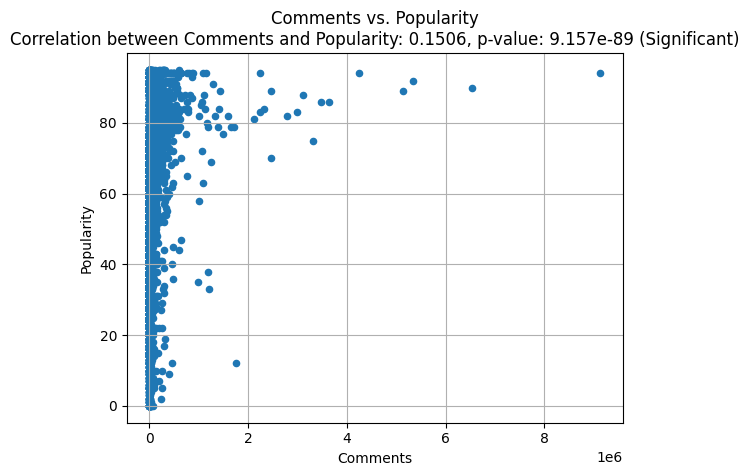

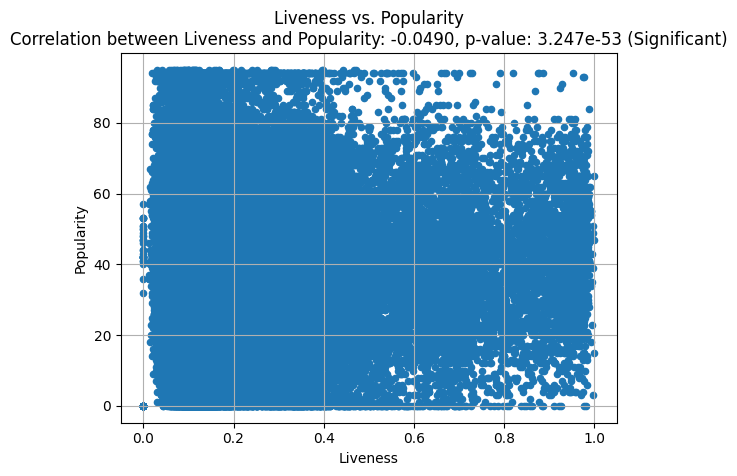

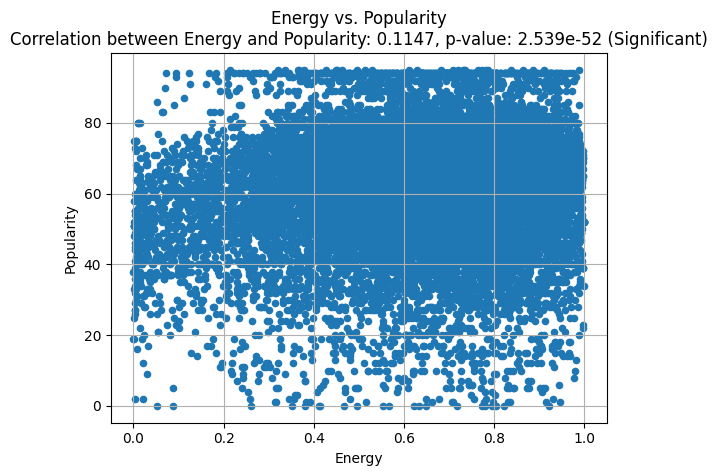

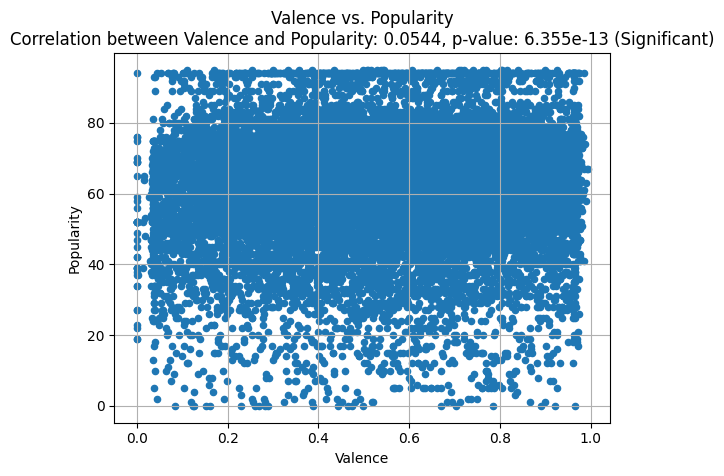

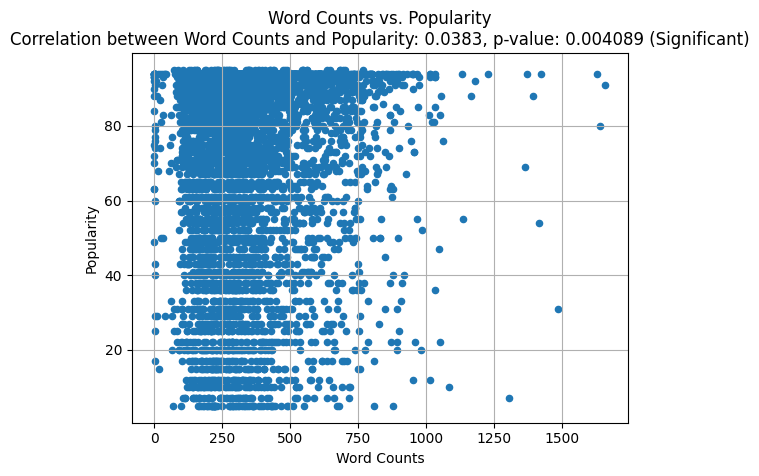

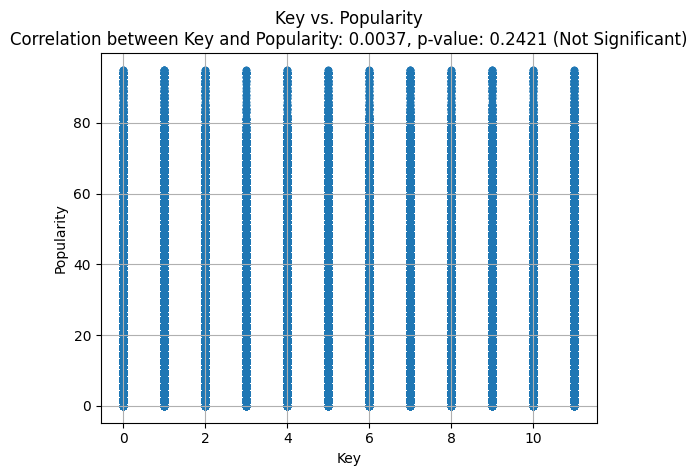

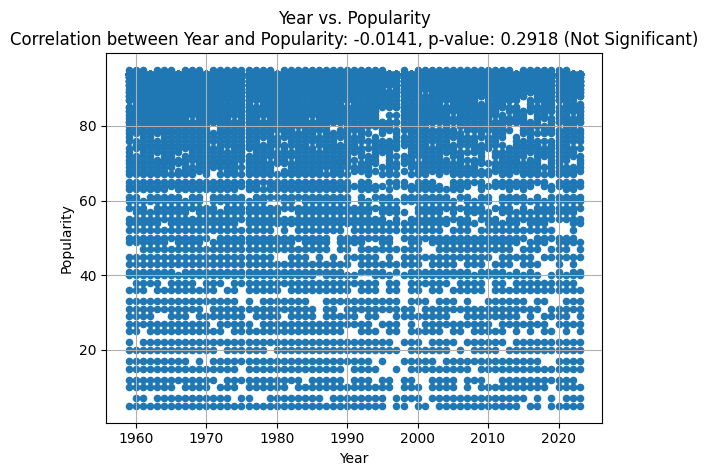

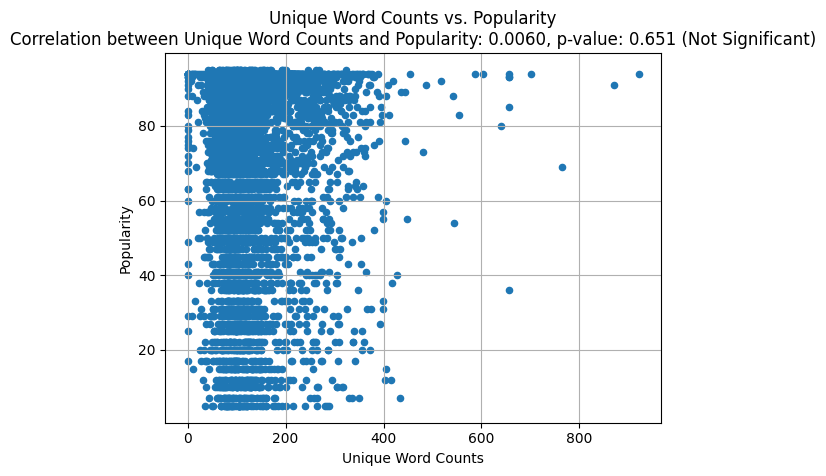

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

combined_data = pd.read_csv('./data/combine_all.csv')

def compute_correlation(df, col1, col2):
    """
    Computes the Pearson correlation coefficient and its p-value.
    """
    x = df[col1].dropna()
    y = df[col2].dropna()
    
    # Ensure both columns have the same length after dropping NaNs
    common_idx = x.index.intersection(y.index)
    x, y = x.loc[common_idx], y.loc[common_idx]

    if len(x) > 1:  # Ensure we have at least two data points
        corr, p_value = stats.pearsonr(x, y)
        return corr, p_value
    else:
        return None, None  # Not enough data to compute correlation

# Iterate through all numerical columns and collect correlation results
numeric_columns = combined_data.select_dtypes(include=['number']).columns
alpha = 0.05  # Significance level

correlation_results = []

for col in numeric_columns:
    if col != "Popularity":  # Avoid correlation of 'Popularity' with itself
        corr, p_value = compute_correlation(combined_data, col, "Popularity")
        
        if corr is not None:
            significance = "Significant" if p_value < alpha else "Not Significant"
            correlation_results.append((col, corr, p_value, significance))

# Sort results by p-value (ascending order: most significant first)
correlation_results.sort(key=lambda x: x[2])

# Print sorted results
print("\nSorted Correlation Results (By Statistical Significance):")
for col, corr, p_value, significance in correlation_results:
    combined_data.plot.scatter(x=col, y="Popularity", title=f"{col} vs. Popularity\nCorrelation between {col} and Popularity: {corr:.4f}, p-value: {p_value:.4g} ({significance})", grid=True)

TODO: Implement evaluation of categorical variables

In [43]:
import numpy as np

def correlation_ratio(categories, values):
    """
    Computes the correlation ratio (η²) for a categorical feature 
    against a continuous target.
    """
    unique_categories = np.unique(categories)
    overall_mean = np.mean(values)
    
    # Compute between-group variance
    between_group_var = sum(len(values[categories == cat]) * (np.mean(values[categories == cat]) - overall_mean)**2 
                            for cat in unique_categories)
    
    # Compute total variance
    total_var = np.sum((values - overall_mean) ** 2)
    
    return between_group_var / total_var if total_var > 0 else 0

# Apply to all categorical variables
categorical_cols = combined_data.select_dtypes(include=['object', 'category']).columns
eta_squared_results = {col: correlation_ratio(combined_data[col], combined_data['Popularity']) for col in categorical_cols}

# Display sorted results
print(pd.Series(eta_squared_results).sort_values(ascending=False))


KeyboardInterrupt: 

## 5. Metric Selection



## 6. Model Building


## 7. Model Evaluation


## 8. Conclusion